In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
from matplotlib.dates import DateFormatter
import platform
import os

plt.rcParams['figure.figsize'] = (10, 4)

In [2]:
year1=1982
year2=1992

In [3]:
#To compute de climatoloy
yearC1='1982'
yearC2='1992'

In [4]:
if os.uname().nodename.lower().find('eemmmbp') != -1:
    base_file = '/Users/pvb/Dropbox/Oceanografia/Data/Satelite/noaa.oisst.v2.highres/NC/sst.day.mean'
elif os.uname().nodename.lower().find('rossby') != -1:
    base_file = '/data/shareddata/Satelite/noaa.oisst.v2.highres/NC/sst.day.mean'
    dataDir = '/home/pvb/Analisis/SSTGlobalAnalysis/data'

In [5]:
files = [f'{base_file}.{year}.nc' for year in range(year1, year2+1)]
DS = xr.open_mfdataset(files)

In [6]:
titulo_short = 'NAtl'
titulo = 'North Atlantic'
sst = DS.sst.sel(lat = slice( 0, 80), lon = slice( 260, 360))

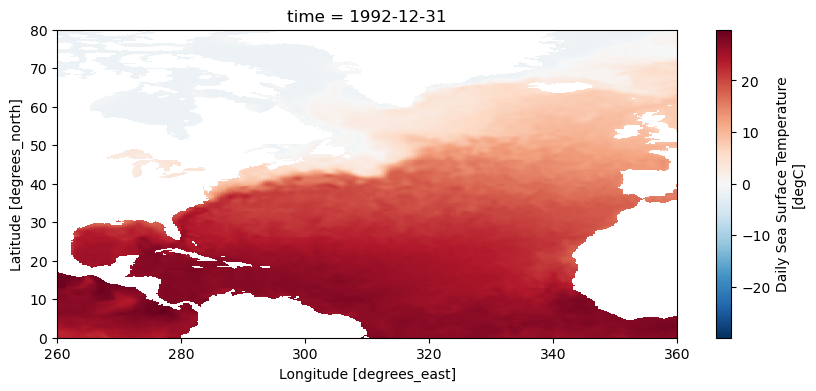

In [7]:
sst[-1,:,:].plot()

# Creo mascara Altlantico norte

In [27]:
basin = xr.open_dataset('http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NODC/.WOA09/.Masks/.basin/dods')
basin = basin.rename({'X': 'lon', 'Y': 'lat'})

In [28]:
basin.to_netcdf('./data/basins.nc',mode='w')

In [50]:
basin2 = xr.open_dataset('./data/basins.nc')

In [51]:
basin2

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 180, Z: 33)
Coordinates:
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * Z        (Z) float32 0.0 10.0 20.0 30.0 50.0 ... 4e+03 4.5e+03 5e+03 5.5e+03
Data variables:
    basin    (Z, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL

In [34]:
# Me quedo solo con la superficie
basin_surf = basin.basin[0]

In [35]:
basin_names=basin_surf.attrs['CLIST'].split('\n')

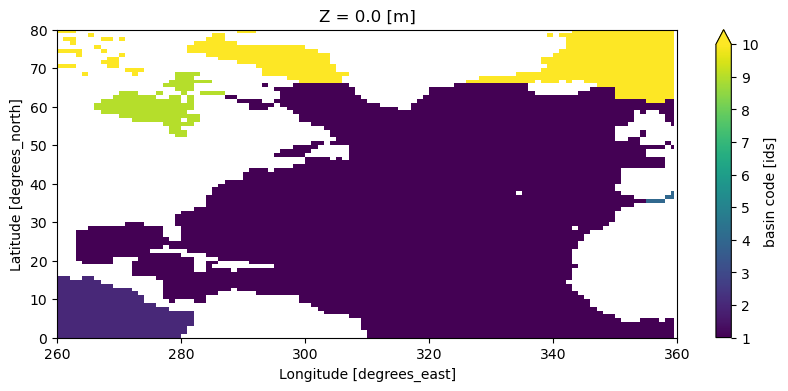

In [36]:
basin_surf_interp = basin_surf.interp_like(sst, method='nearest')
basin_surf_interp.plot(vmax=10)

In [46]:
sstatl=sst.where(basin_surf_interp==1)

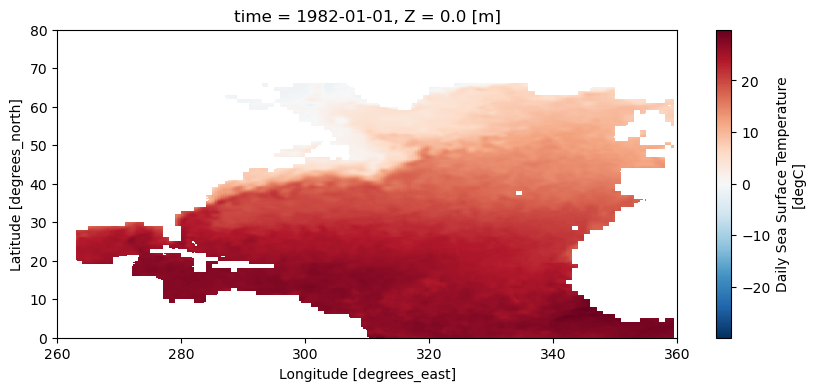

In [48]:
sstatl[:1,:,:].plot()

In [38]:
sst.groupby(basin_surf_interp).first()

<xarray.DataArray 'sst' (time: 4018, basin: 5)>
dask.array<transpose, shape=(4018, 5), dtype=float32, chunksize=(366, 1), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1982-01-01 1982-01-02 ... 1992-12-31
    Z        float32 0.0
  * basin    (basin) float64 1.0 2.0 4.0 9.0 11.0
Attributes:
    long_name:     Daily Sea Surface Temperature
    units:         degC
    valid_range:   [-3. 45.]
    precision:     2.0
    dataset:       NOAA High-resolution Blended Analysis
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Individual Observations
    actual_range:  [-1.8  34.48]

In [39]:
Ylabel  = 'Anomalia de temperatura [($^\circ$C)]'
Xlabel  = 'Fecha'

In [40]:
weights = np.cos(np.deg2rad(sst.lat))
weights = weights/weights.max()
weights.name = "weights"
sst_weighted = sst.weighted(weights)

In [42]:
basin_mean_sst = sst.groupby(basin_surf_interp).mean()
basin_mean_sst

/opt/conda/envs/ocean/lib/python3.11/site-packages/xarray/core/variable.py:1737: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  result = result._stack_once(dims, new_dim)


<xarray.DataArray 'sst' (time: 4018, basin: 5)>
dask.array<transpose, shape=(4018, 5), dtype=float32, chunksize=(366, 1), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1982-01-01 1982-01-02 ... 1992-12-31
    Z        float32 0.0
  * basin    (basin) float64 1.0 2.0 4.0 9.0 11.0
Attributes:
    long_name:     Daily Sea Surface Temperature
    units:         degC
    valid_range:   [-3. 45.]
    precision:     2.0
    dataset:       NOAA High-resolution Blended Analysis
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Individual Observations
    actual_range:  [-1.8  34.48]

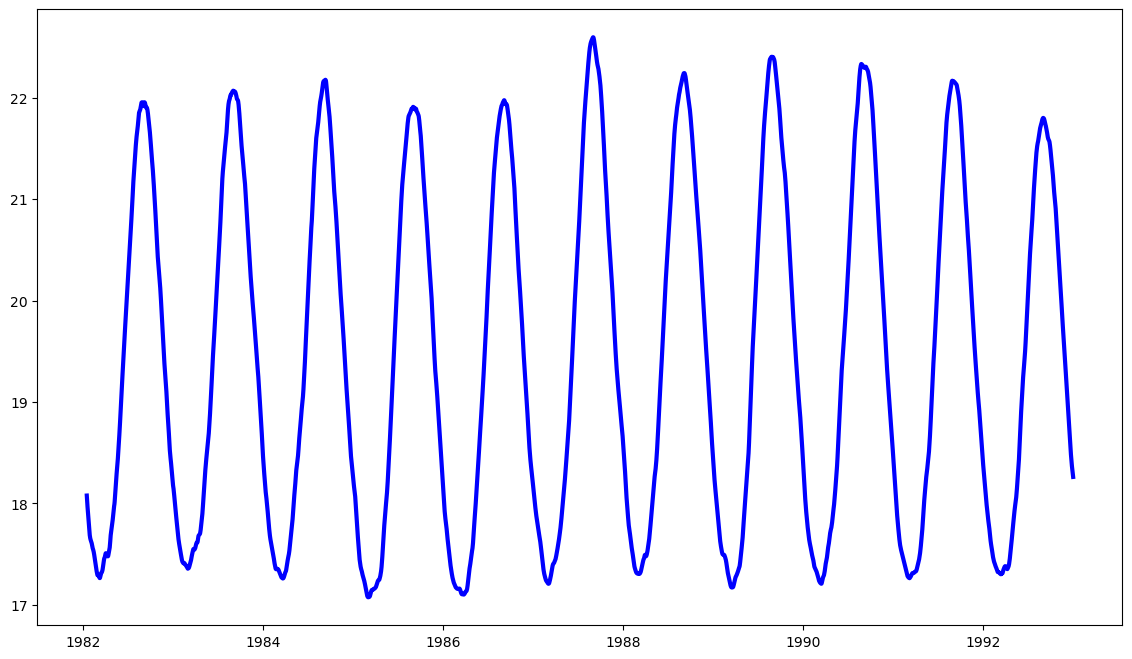

In [43]:
fig, ax = plt.subplots(1 , 1 , figsize = (14,8))
ax.plot(basin_mean_sst.time,basin_mean_sst[:,0].rolling(time = 16).mean(),linewidth=3,color='b')
#ax.plot(basin_Wmean_sst.time,basin_Wmean_sst[:,0].rolling(time = 16).mean(),linewidth=3,color='r')

IndexError: Index 9 is out of bounds for axis 1 with size 5

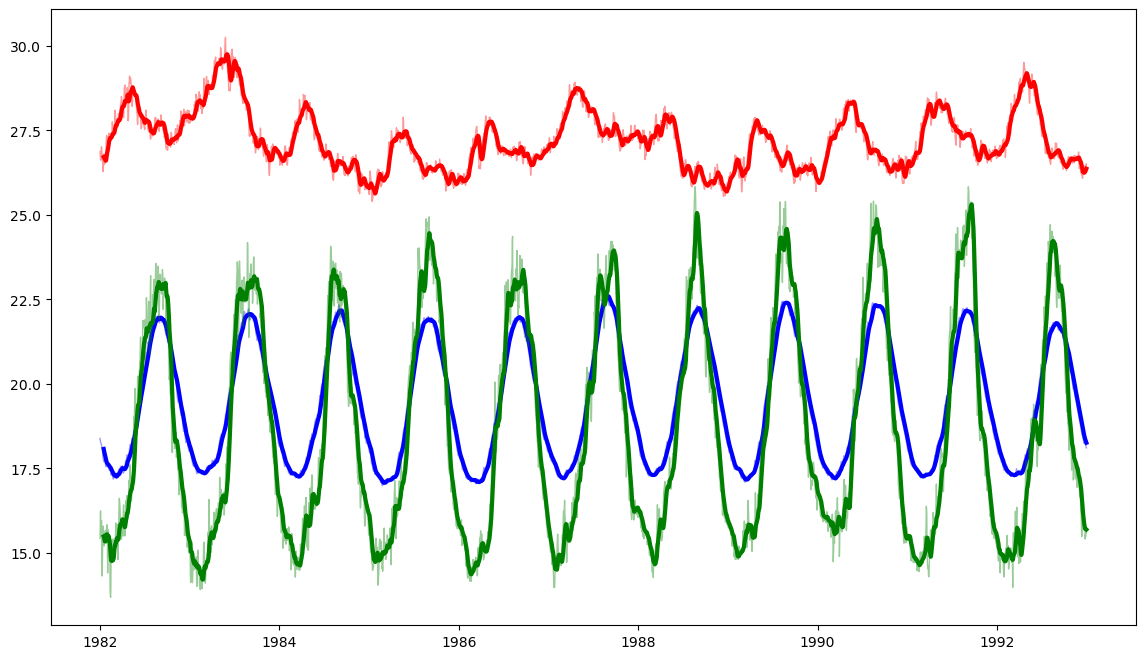

In [44]:
#basin_mean_sst[:,0].rolling(time = 12 ).mean().plot()    
fig, ax = plt.subplots(1 , 1 , figsize = (14,8))

ax.plot(basin_mean_sst.time,basin_mean_sst[:,0].rolling(time = 16).mean(),label=basin_names[0],linewidth=3,color='b')
ax.plot(basin_mean_sst.time,basin_mean_sst[:,0],linewidth=1,color='b',alpha=0.4)

ax.plot(basin_mean_sst.time,basin_mean_sst[:,1].rolling(time = 16).mean(),label=basin_names[1],linewidth=3,color='r')
ax.plot(basin_mean_sst.time,basin_mean_sst[:,1],linewidth=1,color='r',alpha=0.4)

ax.plot(basin_mean_sst.time,basin_mean_sst[:,2].rolling(time = 16).mean(),label=basin_names[2],linewidth=3,color='g')
ax.plot(basin_mean_sst.time,basin_mean_sst[:,2],linewidth=1,color='g',alpha=0.4)

ax.plot(basin_mean_sst.time,basin_mean_sst[:,9].rolling(time = 16).mean(),label=basin_names[9],linewidth=3,color='c')
ax.plot(basin_mean_sst.time,basin_mean_sst[:,9],linewidth=1,color='c',alpha=0.4)

ax.set_ylabel(Ylabel)
ax.set_xlabel(Xlabel)
ax.set_frame_on(False)
ax.grid(linestyle='-', linewidth=.9)
ax.legend()